### Kankamon Thaweephol ID:60199130056

## Data Science Project  

### Modeling PM10 Urban Pollution Using Machine Learning and Selected Meteorological Parameters

## 1. Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot') # make plots look better
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

## 2. Import Dataset

ทำการ import dataset และทำการเช็คข้อมูลที่มีอยู่ใน data set

In [2]:
df = pd.read_csv('11T_2006nd.csv')

In [3]:
df.head()

,DATE,DATE.1,YEAR,TIME,CO,NO,NOX,NO2,SO2,O3,PM10,WSPD,WDIR,TEMP,RHUM,GLOB,NRAD,PRES,STWD,RAIN
0,60101.0,1/1/2006,2006.0,100.0,1.3,22,68,47,11,2,69,1,325,24.4,57,0,-29,758,20,0
1,60101.0,1/1/2006,2006.0,200.0,1.1,14,52,37,9,3,44,1.1,330,23.8,60,0,-28,757,24,0
2,60101.0,1/1/2006,2006.0,300.0,1,19,53,34,11,1,40,0.9,324,23.3,62,0,-27,757,24,0
3,60101.0,1/1/2006,2006.0,400.0,1,16,49,32,12,1,36,1.1,317,22.8,63,0,-20,757,20,0
4,60101.0,1/1/2006,2006.0,500.0,1.1,13,43,30,11,2,44,1.1,327,22.4,64,0,-25,757,24,0


In [4]:
len(df)

8760

In [5]:
len(df.columns)

20

In [6]:
df.columns

Index(['DATE', 'DATE.1', 'YEAR', 'TIME', 'CO', 'NO', 'NOX', 'NO2', 'SO2', 'O3',
       'PM10', 'WSPD', 'WDIR', 'TEMP', 'RHUM', 'GLOB', 'NRAD', 'PRES', 'STWD',
       'RAIN'],
      dtype='object')

In [7]:
df

,DATE,DATE.1,YEAR,TIME,CO,NO,NOX,NO2,SO2,O3,PM10,WSPD,WDIR,TEMP,RHUM,GLOB,NRAD,PRES,STWD,RAIN
0,60101.0,1/1/2006,2006.0,100.0,1.3,22,68,47,11,2,69,1,325,24.4,57,0,-29,758,20,0
1,60101.0,1/1/2006,2006.0,200.0,1.1,14,52,37,9,3,44,1.1,330,23.8,60,0,-28,757,24,0
2,60101.0,1/1/2006,2006.0,300.0,1,19,53,34,11,1,40,0.9,324,23.3,62,0,-27,757,24,0
3,60101.0,1/1/2006,2006.0,400.0,1,16,49,32,12,1,36,1.1,317,22.8,63,0,-20,757,20,0
4,60101.0,1/1/2006,2006.0,500.0,1.1,13,43,30,11,2,44,1.1,327,22.4,64,0,-25,757,24,0
5,60101.0,1/1/2006,2006.0,600.0,1.1,21,51,30,12,2,42,1,322,22.4,64,0,-12,757,29,0
6,60101.0,1/1/2006,2006.0,700.0,1.2,23,52,29,15,1,41,1.2,317,22.1,65,0,-10,758,20,0
7,60101.0,1/1/2006,2006.0,800.0,1,24,51,27,12,2,37,1.6,322,22.1,65,35,16,758,24,0
8,60101.0,1/1/2006,2006.0,900.0,0.799999,15,38,24,11,10,33,2,343,23,62,104,72,759,24,0
9,60101.0,1/1/2006,2006.0,1000.0,0.7,8,31,23,9,21,38,1.8,344,24.7,57,257,285,759,29,0


## 3. Data Wrangling

ทำการเช็คข้อมูลว่าตรงไหนมีค่าว่างให้ทำการเติม nan ลงไป และจากนั้นจึงทำการ drop ทิ้งไป

In [8]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [9]:
len(df[df.isnull().any(axis=1)])

3064

In [10]:
r_index = df[df.isnull().any(axis=1)].index.tolist()

In [11]:
len(r_index)

3064

In [12]:
df_drop = df.dropna()

In [13]:
df_drop

,DATE,DATE.1,YEAR,TIME,CO,NO,NOX,NO2,SO2,O3,PM10,WSPD,WDIR,TEMP,RHUM,GLOB,NRAD,PRES,STWD,RAIN
0,60101.0,1/1/2006,2006.0,100.0,1.3,22,68,47,11,2,69,1,325,24.4,57,0,-29,758,20,0
1,60101.0,1/1/2006,2006.0,200.0,1.1,14,52,37,9,3,44,1.1,330,23.8,60,0,-28,757,24,0
2,60101.0,1/1/2006,2006.0,300.0,1,19,53,34,11,1,40,0.9,324,23.3,62,0,-27,757,24,0
3,60101.0,1/1/2006,2006.0,400.0,1,16,49,32,12,1,36,1.1,317,22.8,63,0,-20,757,20,0
4,60101.0,1/1/2006,2006.0,500.0,1.1,13,43,30,11,2,44,1.1,327,22.4,64,0,-25,757,24,0
5,60101.0,1/1/2006,2006.0,600.0,1.1,21,51,30,12,2,42,1,322,22.4,64,0,-12,757,29,0
6,60101.0,1/1/2006,2006.0,700.0,1.2,23,52,29,15,1,41,1.2,317,22.1,65,0,-10,758,20,0
7,60101.0,1/1/2006,2006.0,800.0,1,24,51,27,12,2,37,1.6,322,22.1,65,35,16,758,24,0
8,60101.0,1/1/2006,2006.0,900.0,0.799999,15,38,24,11,10,33,2,343,23,62,104,72,759,24,0
9,60101.0,1/1/2006,2006.0,1000.0,0.7,8,31,23,9,21,38,1.8,344,24.7,57,257,285,759,29,0


จำนวนข้อมูลที่เหลืออยู่หลังจากทำการ drop แถวที่มีค่าว่างไป จากนั้นทำการเช็ค type ของข้อมูล แล้วทำการแปลง row ที่จะใช้ค่าให้เปลี่ยนจาก object เป็น float64

In [14]:
len(df_drop)

5696

In [15]:
df.dtypes

DATE      float64
DATE.1     object
YEAR      float64
TIME      float64
CO         object
NO         object
NOX        object
NO2        object
SO2        object
O3         object
PM10       object
WSPD       object
WDIR       object
TEMP       object
RHUM       object
GLOB       object
NRAD       object
PRES       object
STWD       object
RAIN       object
dtype: object

In [16]:
df1 = pd.DataFrame(df_drop)

In [17]:
df1[['PM10', 'WSPD', 'WDIR', 'RAIN', 'RHUM', 'TEMP', 'NRAD', 'PRES', 'STWD', 'CO', 'NO', 'NO2', 'SO2', 'O3']].dtypes

PM10    object
WSPD    object
WDIR    object
RAIN    object
RHUM    object
TEMP    object
NRAD    object
PRES    object
STWD    object
CO      object
NO      object
NO2     object
SO2     object
O3      object
dtype: object

In [18]:
df1[['PM10', 'WSPD', 'WDIR', 'RAIN', 'RHUM', 'TEMP', 'NRAD', 'PRES', 'STWD', 'CO', 'NO', 'NO2', 'SO2', 'O3']] = df1[['PM10', 'WSPD', 'WDIR', 'RAIN', 'RHUM', 'TEMP', 'NRAD', 'PRES', 'STWD', 'CO', 'NO', 'NO2', 'SO2', 'O3']].apply(pd.np.float64)
df1.dtypes

DATE      float64
DATE.1     object
YEAR      float64
TIME      float64
CO        float64
NO        float64
NOX        object
NO2       float64
SO2       float64
O3        float64
PM10      float64
WSPD      float64
WDIR      float64
TEMP      float64
RHUM      float64
GLOB       object
NRAD      float64
PRES      float64
STWD      float64
RAIN      float64
dtype: object

In [19]:
df1.describe()

,DATE,YEAR,TIME,CO,NO,NO2,SO2,O3,PM10,WSPD,WDIR,TEMP,RHUM,NRAD,PRES,STWD,RAIN
count,5696.000000,5696.0,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000
mean,60587.772999,2006.0,1262.938904,0.998999,30.990607,27.416784,6.728406,12.191011,37.280372,0.915783,192.062149,28.115449,67.808989,74.689256,757.192065,83.335850,0.164677
std,284.401507,0.0,701.795815,0.424468,25.199596,13.393554,3.825125,13.939177,17.912524,0.506875,83.824487,2.850359,12.934577,147.993824,1.784819,29.879478,1.547097
min,60101.000000,2006.0,100.000000,0.000000,0.500000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,18.400000,24.000000,-48.000000,752.000000,0.000000,0.000000
25%,60328.000000,2006.0,600.000000,0.700000,14.000000,18.000000,4.000000,4.000000,25.000000,0.599999,140.000000,26.200000,60.000000,-22.000000,756.000000,63.000000,0.000000
50%,60609.000000,2006.0,1300.000000,0.900000,23.000000,24.000000,6.000000,6.000000,35.000000,0.799999,190.000000,28.100000,69.000000,-13.000000,757.000000,83.000000,0.000000
75%,60824.000000,2006.0,1900.000000,1.200000,39.000000,33.000000,8.000000,16.000000,47.000000,1.200000,257.000000,30.100000,76.000000,132.250000,758.000000,103.000000,0.000000
max,61031.000000,2006.0,2400.000000,5.300000,217.000000,113.000000,29.000000,129.000000,154.000000,3.300000,360.000000,36.700000,95.000000,588.000000,763.000000,147.000000,41.500000


## 4. Feature Selection by checking the relationship between data

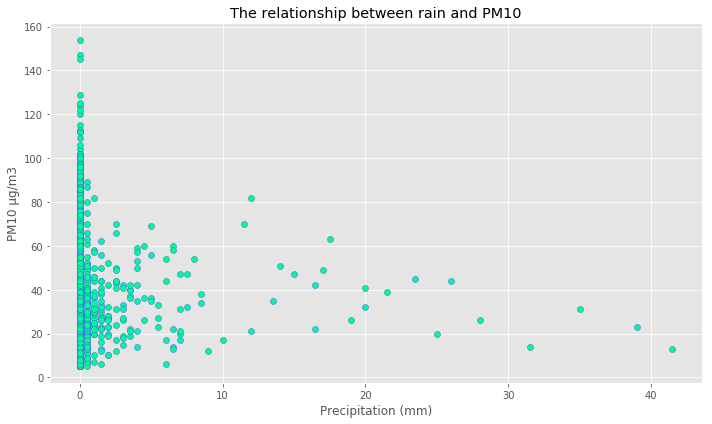

In [20]:
x = df1['RAIN']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('Precipitation (mm)')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between rain and PM10')
fig.tight_layout()
plt.show()
fig.savefig('The relationship between rain and PM10.png')

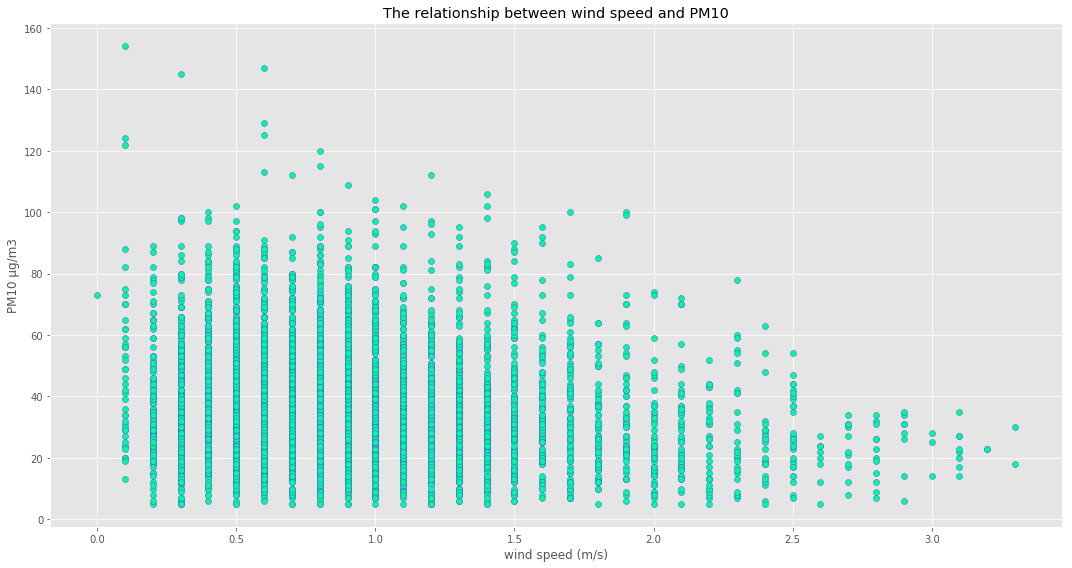

In [21]:
x = df1['WSPD']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('wind speed (m/s)')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between wind speed and PM10')
fig.tight_layout()
plt.show()

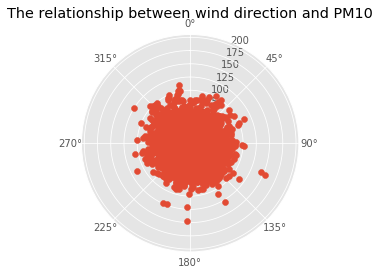

In [22]:
from math import radians
ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in df1['WDIR'].values], y=df1['PM10'].values)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('The relationship between wind direction and PM10')
fig.tight_layout()
plt.show()

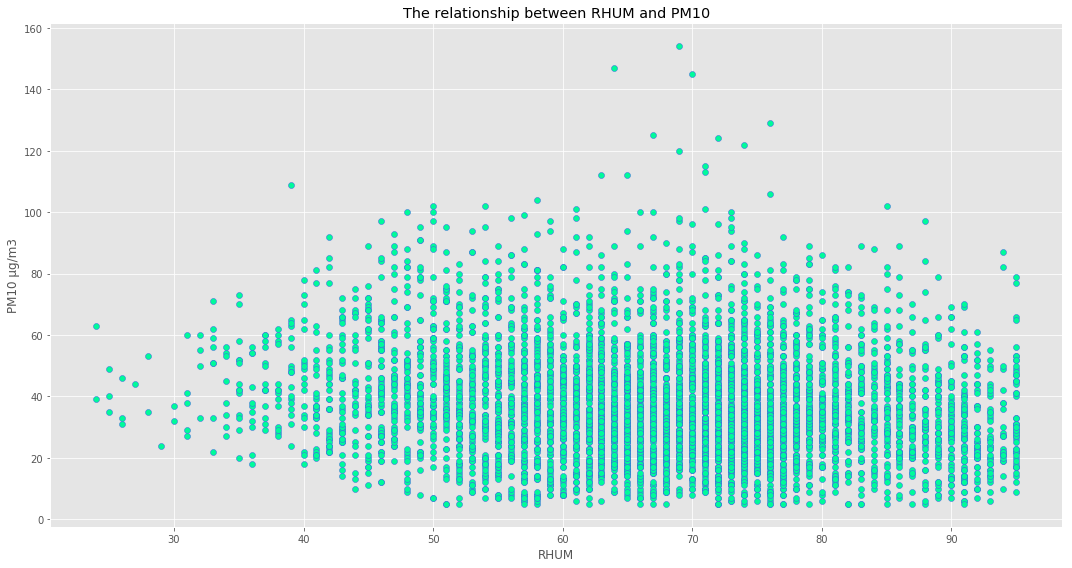

In [23]:
x = df1['RHUM']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('RHUM')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between RHUM and PM10')
fig.tight_layout()
plt.show()

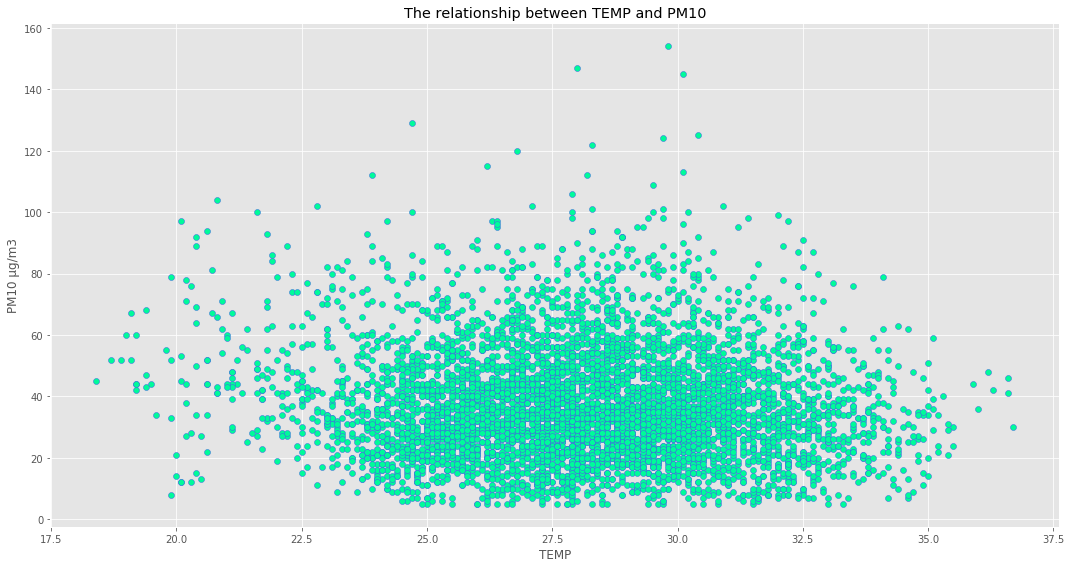

In [24]:
x = df1['TEMP']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('TEMP')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between TEMP and PM10')
fig.tight_layout()
plt.show()

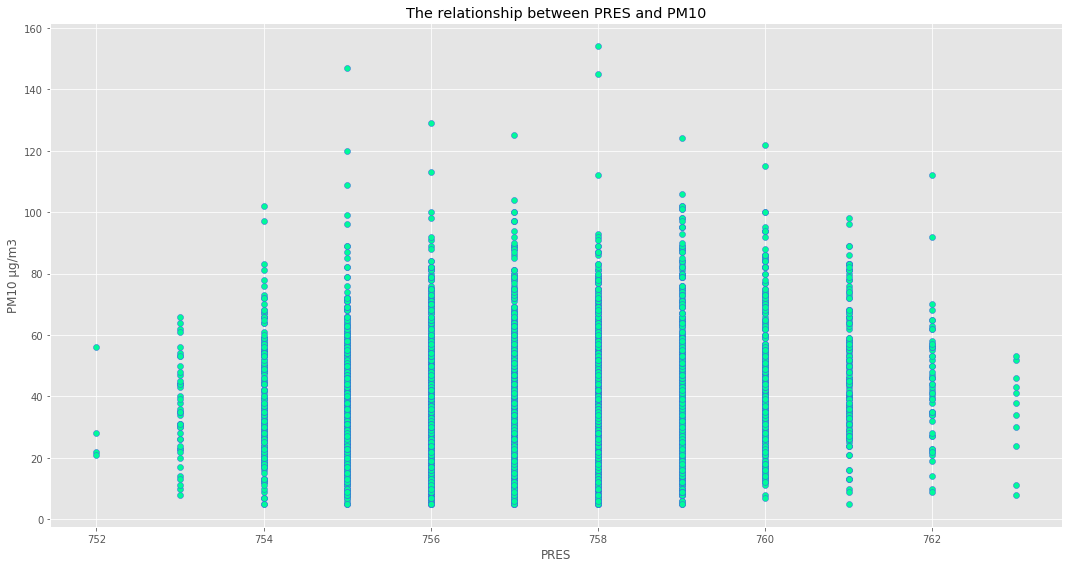

In [25]:
x = df1['PRES']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('PRES')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between PRES and PM10')
fig.tight_layout()
plt.show()

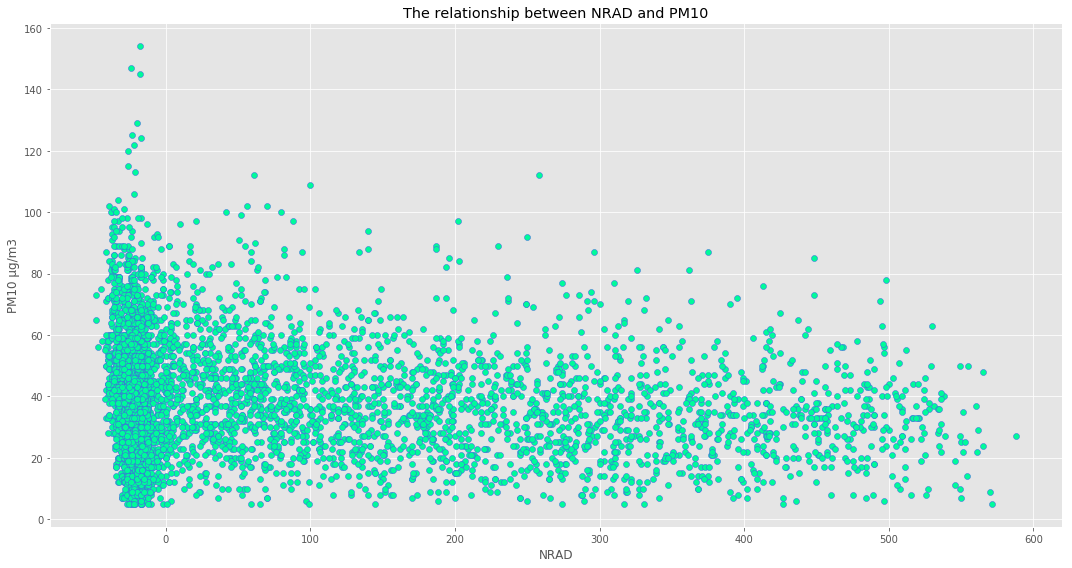

In [26]:
x = df1['NRAD']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('NRAD')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between NRAD and PM10')
fig.tight_layout()
plt.show()

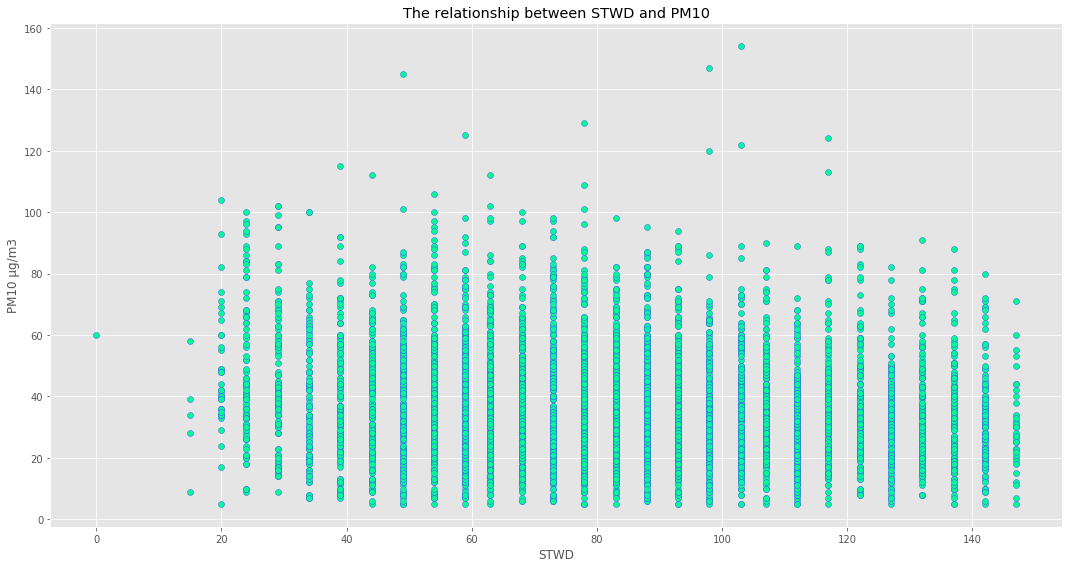

In [27]:
x = df1['STWD']
y = df1['PM10']
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='royalblue')
ax.set_xlabel('STWD')
plt.ylabel('PM10 μg/m3')
ax.set_title('The relationship between STWD and PM10')
fig.tight_layout()
plt.show()

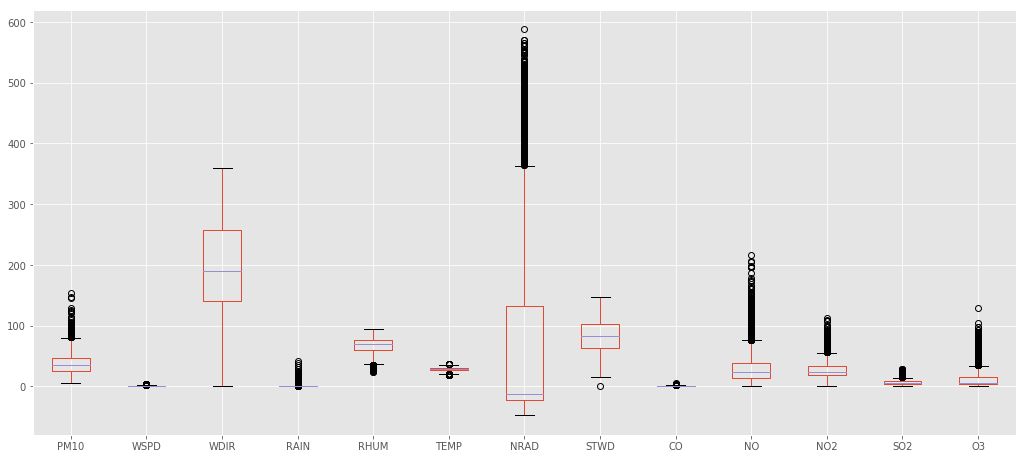

In [29]:
plt.figure();
df1.boxplot(column=['PM10', 'WSPD','WDIR', 'RAIN', 'RHUM', 'TEMP', 'NRAD', 'STWD', 'CO', 'NO', 'NO2', 'SO2', 'O3'])
plt.subplots_adjust(right=2.4, top = 1.6)
plt.show()

## 5. Training and Tuning the Algorithm 
- by using grid search and scaling
- label คือ 'PM10' 
- feature คือ 'WSPD','WDIR', 'RAIN', 'RHUM', 'TEMP', 'PRES', 'NRAD', 'STWD', 'TIME', 'DATE'

#### โดยเลือกใช้ Algorithm :
- Ridge regression
- Linear Regression
- SVR
- Random Forest Regressor
- Gradient Boosting Regressor

In [30]:
y = df1['PM10']

In [31]:
X = df1[['WSPD','WDIR', 'RAIN', 'RHUM', 'TEMP', 'PRES', 'NRAD', 'STWD', 'CO', 'NO', 'NO2', 'SO2', 'O3']]

In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

### Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.47664018113336909

In [34]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.47664018113336909

In [35]:
from sklearn.model_selection import GridSearchCV

ridge_pipe = make_pipeline(StandardScaler(), Ridge())
param_grid = {'ridge__alpha': [1,0.1,0.01,0.001,0.0001,0]}
rid_grid = GridSearchCV(ridge_pipe, param_grid, cv=10)
rid_grid.fit(X_train, y_train)
print(rid_grid.best_params_)
print(rid_grid.score(X_test, y_test))

{'ridge__alpha': 1}
0.476640181133


In [36]:
print('Best score:', rid_grid.score(X_test, y_test))
print('Best estimator:', rid_grid.best_params_)

Best score: 0.476640181133
Best estimator: {'ridge__alpha': 1}


In [37]:
y_pred1 = rid_grid.predict(X_test)

In [38]:
rid_mae = metrics.mean_absolute_error(y_test, y_pred1)
rid_mse = metrics.mean_squared_error(y_test, y_pred1)
rid_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred1))

In [39]:
# print result of MAE
#print result of MSE
# RMSE
print('Mean Absolute Error:', rid_mae)
print('Mean Squared Error:', rid_mse)  
print('Root Mean Squared Error:', rid_rmse) 

Mean Absolute Error: 9.8939818724
Mean Squared Error: 166.958648799
Root Mean Squared Error: 12.9212479583


### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
pipe = make_pipeline(StandardScaler(),LinearRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.47665468255300064

In [41]:
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())
param_grid = {"linearregression__fit_intercept": [True, False],
    "linearregression__normalize" : [True, False],
    "linearregression__copy_X" :  [True, False]}
linear_grid = GridSearchCV(linear_pipe, param_grid, cv=5, n_jobs=-1)
linear_grid.fit(X_train, y_train)
print(linear_grid.best_params_)
print(linear_grid.score(X_test, y_test))

{'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__normalize': True}
0.476654682553


In [42]:
print('Best score:',linear_grid.score(X_test, y_test))
print('Best params:', linear_grid.best_params_)

Best score: 0.476654682553
Best params: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__normalize': True}


In [43]:
y_pred = linear_grid.predict(X_test)

In [44]:
linear_mae = metrics.mean_absolute_error(y_test, y_pred)
linear_mse = metrics.mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [45]:
print('Mean Absolute Error:', linear_mae)
print('Mean Squared Error:', linear_mse)  
print('Root Mean Squared Error:', linear_rmse) 

Mean Absolute Error: 9.89378604538
Mean Squared Error: 166.954022656
Root Mean Squared Error: 12.921068944


### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.43846633907720922

In [46]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
param_grid = {"randomforestregressor__n_estimators": [100, 400],
    "randomforestregressor__max_depth": [3, None],
    "randomforestregressor__max_features": [ 3, 6, 8, 10],
    "randomforestregressor__min_samples_split": [2, 5, 10],
    "randomforestregressor__min_samples_leaf": [1, 3, 10],
    "randomforestregressor__bootstrap": [True, False]}
gridrf = GridSearchCV(rf_pipe, param_grid, cv=5, n_jobs=-1)
gridrf.fit(X_train, y_train)
print(gridrf.best_params_)
print(gridrf.score(X_test, y_test))

{'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 6, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 400}
0.653621041891


In [47]:
print('Best score:',gridrf.score(X_test, y_test))
print('Best params:', gridrf.best_params_)

Best score: 0.653621041891
Best params: {'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 6, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 400}


In [48]:
modelPred = gridrf.predict(X_test)

In [49]:
rf_mae = metrics.mean_absolute_error(y_test, modelPred)
rf_mse = metrics.mean_squared_error(y_test, modelPred)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, modelPred))

In [50]:
print('Mean Absolute Error:', rf_mae)
print('Mean Squared Error:', rf_mse)  
print('Root Mean Squared Error:', rf_rmse) 

Mean Absolute Error: 10.6710375653
Mean Squared Error: 206.562863753
Root Mean Squared Error: 14.3722950065


### Gradient Boosting Regressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = make_pipeline(StandardScaler(),GradientBoostingRegressor())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5396317388716001

In [52]:
gb_pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())
param_grid = {"gradientboostingregressor__learning_rate": [0.1, 0.05, 0.02, 0.01],
    "gradientboostingregressor__n_estimators": [100, 300, 600],
    "gradientboostingregressor__max_depth": [4, 6, 8],
    "gradientboostingregressor__min_samples_leaf": [5, 10, 20,50],
    "gradientboostingregressor__max_features": [3, 6 , 8 ,10]}
gb_grid = GridSearchCV(gb_pipe, param_grid, cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)
print(gb_grid.best_params_)
print(gb_grid.score(X_test, y_test))

{'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 8, 'gradientboostingregressor__max_features': 8, 'gradientboostingregressor__min_samples_leaf': 5, 'gradientboostingregressor__n_estimators': 600}
0.695339044942


In [53]:
print('Best score:',gb_grid.score(X_test, y_test))
print('Best params:', gb_grid.best_params_)

Best score: 0.695339044942
Best params: {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 8, 'gradientboostingregressor__max_features': 8, 'gradientboostingregressor__min_samples_leaf': 5, 'gradientboostingregressor__n_estimators': 600}


In [54]:
modelPred2 = gb_grid.predict(X_test)

In [55]:
gb_mae = metrics.mean_absolute_error(y_test, modelPred2)
gb_mse = metrics.mean_squared_error(y_test, modelPred2)
gb_rmse = np.sqrt(metrics.mean_squared_error(y_test, modelPred2))

In [56]:
print('Mean Absolute Error:', gb_mae)
print('Mean Squared Error:', gb_mse)  
print('Root Mean Squared Error:', gb_rmse) 

Mean Absolute Error: 10.0227308205
Mean Squared Error: 181.684360084
Root Mean Squared Error: 13.4790340931


### Support Vector Regression (SVR)

In [57]:
from sklearn.svm import SVR
pipe = make_pipeline(StandardScaler(), SVR())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.42952725543133558

In [58]:
svr_pipe = make_pipeline(StandardScaler(), SVR())
param_grid = {"svr__C": [0.5, 1.0, 5, 10, 20, 50, 100],
    "svr__kernel": ['linear', 'rbf', 'poly'],
    "svr__epsilon": [0.1,0.2,0.5,0.3]}
svr_grid = GridSearchCV(svr_pipe, param_grid, cv=5, n_jobs=-1)
svr_grid.fit(X_train, y_train)
print(svr_grid.best_params_)
print(svr_grid.score(X_test, y_test))

{'svr__C': 100, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf'}
0.505083217087


In [59]:
print('Best score:',svr_grid.score(X_test, y_test))
print('Best params:', svr_grid.best_params_)

Best score: 0.505083217087
Best params: {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf'}


In [60]:
modelPred3 = svr_grid.predict(X_test)

In [61]:
svr_mae = metrics.mean_absolute_error(y_test, modelPred3)
svr_mse = metrics.mean_squared_error(y_test, modelPred3)
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, modelPred3))

In [62]:
print('Mean Absolute Error:', svr_mae)
print('Mean Squared Error:', svr_mse)  
print('Root Mean Squared Error:', svr_rmse) 

Mean Absolute Error: 12.7584536601
Mean Squared Error: 295.143297838
Root Mean Squared Error: 17.1797350922


### Summary Score & MAE & MSE & RMSE
| Algorithm | Score | MAE | MSE | RMSE | 
|---|---|---|---|---|  
| Ridge regression | 0.36 | 15.028 |377.351 | 19.425| 
| Linear Regression | 0.36 | 15.028 |377.347 | 19.425 | 
| Random Forest Regressor | 0.65 | 10.671 |206.562 | 14.372 | 
| Gradient Boosting Regressor | 0.69 | 10.022 | 181.684 | 13.479 | 
| SVR | 0.50 | 12.758 | 295.143 |  17.179 | 

ผลที่ได้จากการทดลองในโมเดลต่างๆพบว่า Gradient Boosting Regressor นั้นมีการ predict ค่าออกมาได้มีความแม่นยำมากที่สุดที่ค่า Score: 0.69, MAE: 10.022, MSE: 181.684, RMSE: 13.479	 